In [11]:
import torch 
import sys
import h5py

CAUSICA_FOLDER = '/home/sandor_daniel/work/2024-05-07_active_bayesian_grn/Project-BayesDAG/src/'
sys.path.append(CAUSICA_FOLDER)
import causica

# Load the file
pt_file = torch.load("results/best_model.pt")

# Print the head of the file
for k in pt_file.keys():
    print(k)


log_p_x
_extra_state
ICGNN.stateless_model.W
likelihoods.continuous.mean_base
likelihoods.continuous.logscale_base
likelihoods.categorical.0.base_logits
helper_network.0.0.weight
helper_network.0.0.bias
helper_network.1.block.0.weight
helper_network.1.block.0.bias
helper_network.2.weight
helper_network.2.bias


In [12]:
pt_file['log_p_x']

tensor(-inf)

In [18]:
a = pt_file['likelihoods.continuous.mean_base'].cpu().numpy()
a.shape

(10, 62)

In [1]:
import numpy as np
import h5py    
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


f = h5py.File('rnaseq_calico/ad_worm_aging.h5ad','r')   

posterior = np.load("/home/sandor_daniel/work/2024-05-07_active_bayesian_grn/results/gflow/gflow_posterior.npy")

row_filter = f['obs']['annotate_name']['codes'][()] == 0
col_filter = f['var']['gene_class']['codes'][()] == 0

age_codes = f['obs']['timepoint']['codes'][()]
age_categories = f['obs']['timepoint']['categories'][()]
age_bytes = age_categories[age_codes[row_filter]]

age = np.array(list(map(lambda a: float(str(a, encoding='utf-8')[1:]), age_bytes)))
expression_counts = f['layers']['denoised'][()][row_filter][:,col_filter]
genes = f['var']['gene_names'][()][col_filter]

X = np.hstack([age[:,None], expression_counts])
cols = np.append(['age'], [str(g, encoding='utf-8') for g in genes], axis=0)
df_X = pd.DataFrame(X, columns=cols)

,age,Y71G12B.44,anr-42,anr-45,anr-10,F48C1.15,anr-20,anr-14,anr-27,anr-39,...,F20G2.9,C15H11.16,T13F3.10,anr-37,T03D8.8,anr-49,anr-24,F19C6.8,anr-16,C44C10.13
0,11.0,0.001587,0.000538,0.002250,1.117805e-06,0.000206,0.016171,0.001043,0.000027,0.000194,...,0.000031,0.004883,0.013831,0.023447,0.000400,0.000516,0.000265,0.000311,0.001755,0.000008
1,11.0,0.009045,0.000061,0.007872,8.876501e-07,0.000456,0.054822,0.000844,0.000022,0.000115,...,0.000026,0.001065,0.001828,0.019646,0.000053,0.000103,0.000227,0.000261,0.001334,0.000002
2,11.0,0.002459,0.000771,0.002982,3.165036e-06,0.000214,0.064386,0.000252,0.000157,0.000561,...,0.000093,0.004986,0.005986,0.004163,0.000085,0.001454,0.000387,0.000470,0.001824,0.000010
3,11.0,0.025524,0.000684,0.005686,5.315975e-07,0.000330,0.017111,0.003382,0.000015,0.000288,...,0.000029,0.001109,0.021856,0.019269,0.000185,0.000113,0.000084,0.000365,0.002869,0.000008
4,11.0,0.002540,0.000242,0.005341,9.801362e-06,0.000652,0.032600,0.001021,0.000194,0.000173,...,0.000020,0.000375,0.028528,0.021361,0.000811,0.002046,0.002627,0.000405,0.001275,0.000047


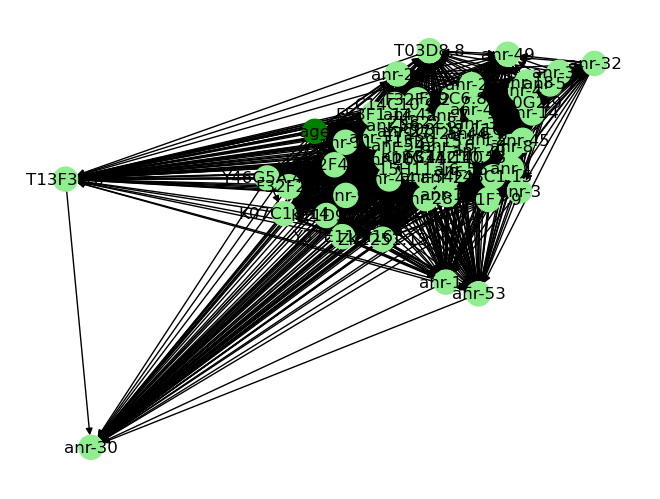

In [2]:
G = nx.from_numpy_array(np.abs(posterior[1]), create_using=nx.DiGraph())
G = nx.relabel_nodes(G, {i:c for i, c in enumerate(cols)})

cmap = ['green'] + ['lightblue' for i in range(1, len(cols))]

for i, gene in enumerate([str(g, encoding='utf-8') for g in genes]):
    if G.has_edge('age', gene) or G.has_edge(gene, 'age') or np.any([G.has_edge(p, gene) for p in G.predecessors('age')]):
        cmap[i+1] = 'lightgreen'


nx.draw(G, node_color=cmap, with_labels=True)

In [8]:
for p in posterior:
    print(p.sum())

1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953
1953


In [7]:
63 * 63 / 2

1984.5

In [10]:
(posterior[0] == posterior[1]).sum()

3395